<a href="https://colab.research.google.com/github/taniacanovilanova/ONLINE_DS_THEBRIDGE_TaniaCano/blob/main/18_Practica_Obligatoria_Introduccion_Keras_HECHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada.

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

Ejemplo del grafico de predicción más nivel de confianza:

![image.png](attachment:image.png)

## 0. Carga de datos

In [83]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [84]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [86]:
# veamos las dimensiones, tenemos 60.000 imágenes en train / 10.000 en test de 28 x 28

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_images.size)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
47040000


In [87]:
# creamos un diccionario que nos permita mapear la clase con su literal

text_labels = {0: "t-shirt/top", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal", 6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

## 1. Visualización de instancias

In [88]:
# vamos a representar una de ellas, nos creamos una función de visualización

def carga_imagen(subset, n_instancia:int):
  if n_instancia > len(subset):
    print("Error, nº instancia no existe en este dataset.")

  else:
      plt.imshow(subset[n_instancia], cmap = "Grays");

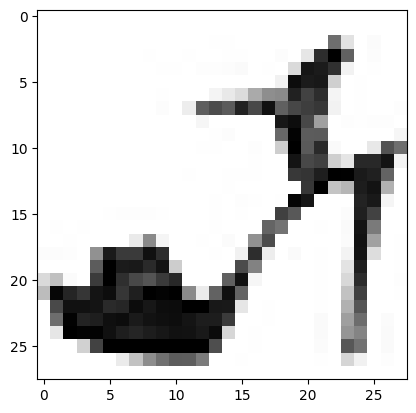

In [89]:
carga_imagen(train_images, 9)

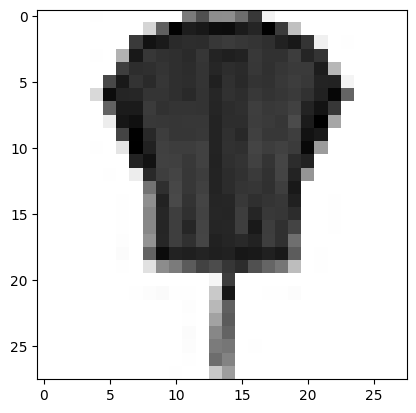

In [90]:
carga_imagen(train_images, 56)

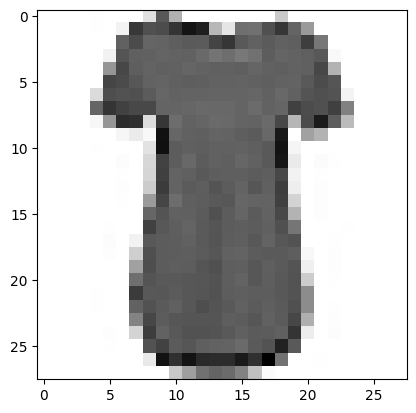

In [91]:
carga_imagen(train_images,56897)

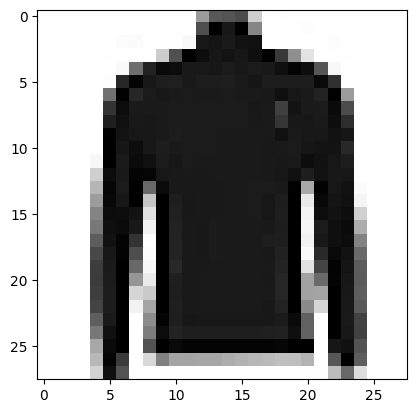

In [92]:
carga_imagen(train_images,1456)

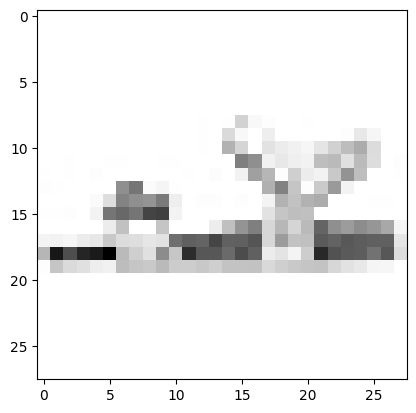

In [93]:
carga_imagen(train_images, 59999)

## 2. Mini-EDA --> distribución del target

In [94]:
pd.Series(train_labels).value_counts(normalize=True) # tenemos un target completamente balanceado

,proportion
9,0.1
0,0.1
3,0.1
2,0.1
7,0.1
5,0.1
1,0.1
6,0.1
4,0.1
8,0.1


## 3. Escalado

In [95]:
# dividimos entre 255 como hemos visto en los workouts, ya que los valores de las escalas de grises van de 0 a 255 (equivalente a un minmax scaler)

X_train = train_images.astype("float32") / 255
X_test = test_images.astype("float32") / 255

y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

In [96]:
X_train[0] # comprobamos la normalización, ya tenemos los valores entre 0 y 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 4. Construcción del modelo

In [97]:
model = keras.models.Sequential() # en primer lugar siempre tendremos una capa sequential para empezar a declarar la red

model.add(keras.layers.Flatten(input_shape=(28,28))) # aplanamos las dimensiones a un único vector

# capas de la red densa, añadimos 2
model.add(keras.layers.Dense(units = 300, # unidades = nº de neuronas de la capa
                             activation='relu'))

model.add(keras.layers.Dense(100,
                             activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax')) # capa de salida con el nº de etiquetas a clasificar, función de activación softmax para multiclase

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# establecemos la configuración de ejecución

model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## 5. Entrenamiento del modelo

In [102]:
# Entrenamos el modelo especificando que emplee un 20% de los datos en validación


# empleamos un early stopping para que interrumpa el entrenamiento cuando no haya progreso en el set de validación (arg 'patience')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,  # nº de épocas en las que parar el entrenamiento si no hay cambios en la funcion de pérdida
                                                  restore_best_weights=True)
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split = 0.2, # 20%
    callbacks = early_stopping_cb   # se ha parado en la época nº 13 pues en las 5 anteriores no ha mejorado la pérdida en validación
)                                   # he ejecutado un par de veces para conseguirlo, siempre ha retomado el accuracy desde donde lo dejó en el fit anterior

Fit model on training data
Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8890 - loss: 0.3124 - val_accuracy: 0.8769 - val_loss: 0.3540
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8887 - loss: 0.3100 - val_accuracy: 0.8732 - val_loss: 0.3645
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8923 - loss: 0.3010 - val_accuracy: 0.8742 - val_loss: 0.3553
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8940 - loss: 0.2982 - val_accuracy: 0.8792 - val_loss: 0.3399
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8935 - loss: 0.2972 - val_accuracy: 0.8812 - val_loss: 0.3379
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8947 - loss: 0.2940 - val_accuracy: 0.8787 - val_loss: 0.3446
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8960 - loss: 0.2912 - val_accuracy: 0.8792 - val_loss: 0.3417
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8944 - loss

## 6. Gráfica de evolución del entrenamiento

In [103]:
# primero vemos el histórico den entrenamiento

print(history.params)
print(history.epoch)
history.history

{'verbose': 'auto', 'epochs': 30, 'steps': 750}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


{'accuracy': [0.8888333439826965,
  0.8900416493415833,
  0.8922083377838135,
  0.8936041593551636,
  0.8940208554267883,
  0.895479142665863,
  0.8966041803359985,
  0.8971874713897705,
  0.8998749852180481,
  0.8999583125114441,
  0.901520848274231,
  0.901729166507721,
  0.9046041369438171],
 'loss': [0.31134045124053955,
  0.30701401829719543,
  0.3027832508087158,
  0.2996388375759125,
  0.29695069789886475,
  0.29367250204086304,
  0.2892094850540161,
  0.287390798330307,
  0.2826901972293854,
  0.2810860574245453,
  0.27716758847236633,
  0.2753555178642273,
  0.27193889021873474],
 'val_accuracy': [0.8769166469573975,
  0.8731666803359985,
  0.8741666674613953,
  0.8791666626930237,
  0.8811666369438171,
  0.8786666393280029,
  0.8791666626930237,
  0.8803333044052124,
  0.8820833563804626,
  0.874916672706604,
  0.878000020980835,
  0.8804166913032532,
  0.8799166679382324],
 'val_loss': [0.3539787530899048,
  0.36450281739234924,
  0.3552798926830292,
  0.3398958444595337,
  

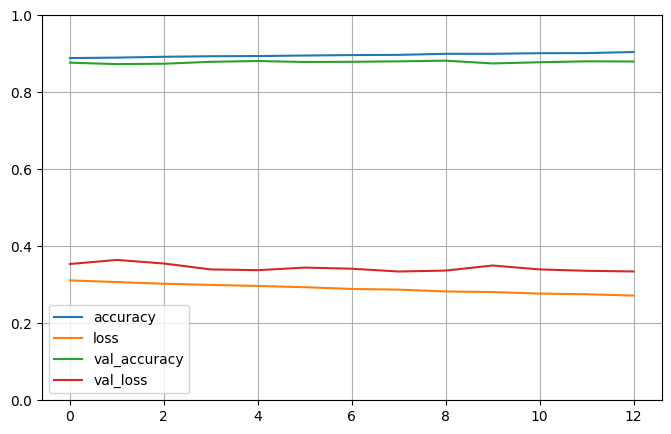

In [104]:
# lo representamos gráficamente, la evolución es bastante plana pues la ganancia en accuracy (y la pérdida en loss) ha sido mínima

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 7. Evaluación contra test

In [105]:
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_test, y_test) # utilizamos el método evaluate para valorar nuestro modelo
print("test loss, test acc:", results)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8752 - loss: 0.3599
test loss, test acc: [0.360187828540802, 0.8741999864578247]


/tmp/ipython-input-108-3607021160.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[4790].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


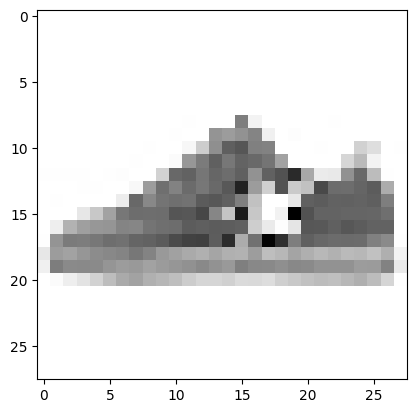

In [108]:
# probamos con uno al azar

plt.imshow(X_test[4790].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [109]:
predictions = model.predict(X_test[4790:47911]).round(3)  # tenemos que pasarle un slicing
print("predictions shape:", predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
predictions shape: (5210, 10)
[0.    0.    0.    0.    0.    0.051 0.    0.946 0.    0.003]
7


In [110]:
# recuperamos nuestro diccionario para comprobar si la predicción es correcta --> lo es! :)

text_labels[7]

'sneaker'

/tmp/ipython-input-112-1347264064.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[505].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


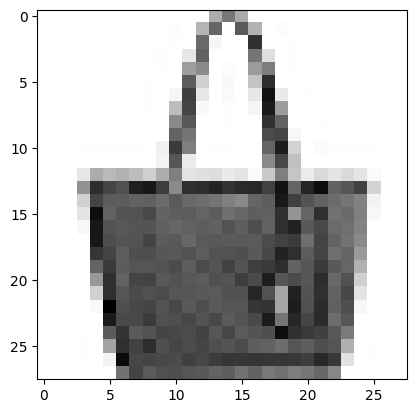

In [112]:
# probamos otra predicción al azar
plt.imshow(X_test[505].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [113]:
predictions = model.predict(X_test[505:506]).round(3)  # tenemos que pasarle un slicing
print("predictions shape:", predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
predictions shape: (1, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


In [114]:
text_labels[8]

'bag'

/tmp/ipython-input-115-2080443180.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[733].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


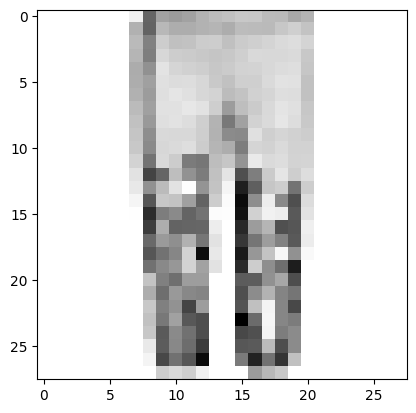

In [115]:
# probamos otra predicción al azar
plt.imshow(X_test[733].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [116]:
# y otra más para terminar

predictions = model.predict(X_test[733:734]).round(3)  # tenemos que pasarle un slicing
print("predictions shape:", predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predictions shape: (1, 10)
[0.001 0.994 0.    0.003 0.    0.    0.001 0.    0.    0.   ]
1


In [117]:
text_labels[1]

'trouser'

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1000
         1.0       0.99      0.96      0.98      1000
         2.0       0.79      0.79      0.79      1000
         3.0       0.84      0.91      0.88      1000
         4.0       0.82      0.76      0.79      1000
         5.0       0.94      0.96      0.95      1000
         6.0       0.68      0.68      0.68      1000
         7.0       0.93      0.94      0.94      1000
         8.0       0.96      0.96      0.96      1000
         9.0       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



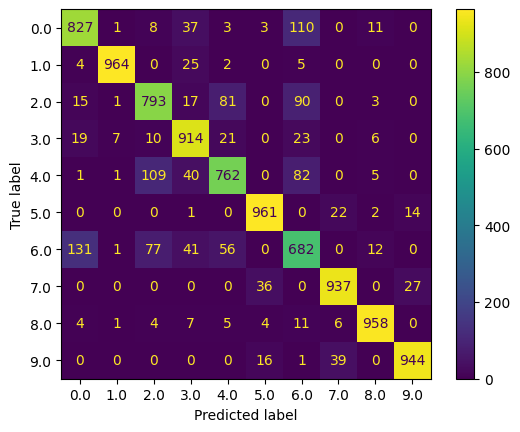

In [125]:
# sacamos el report de clasificación

y_pred = [np.argmax(predictions) for predictions in model.predict(X_test)]

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [137]:
# la clase que cuenta con menor porcentaje de aciertos en todas las métricas es la # 6, seguida de la # 2

#

print("* Clase con menor porcentaje de acierto:")
print(f"Clase 6/{text_labels[6]}")
print(f"Según la matriz de confusión, la suele confundir con la clase 0, es decir, {text_labels[0]}, seguida de la 2/{text_labels[2]}")
print("\n")
print("* Segunda clase con menor % de acierto (empate):")
print(f"Clase 2/{text_labels[2]}")
print(f"Según la matriz de confusión, la suele confundir con la clase 6, es decir, {text_labels[6]}, seguida de la 4/{text_labels[4]}")
print("\n")
print("* Segunda clase con menor % de acierto (empate):")
print(f"Clase 4/{text_labels[4]}")
print(f"Según la matriz de confusión, la suele confundir con la clase 2, es decir, {text_labels[2]}, seguida de la 6/{text_labels[6]}")


* Clase con menor porcentaje de acierto:
Clase 6/shirt
Según la matriz de confusión, la suele confundir con la clase 0, es decir, t-shirt/top, seguida de la 2/pullover


* Segunda clase con menor % de acierto (empate):
Clase 2/pullover
Según la matriz de confusión, la suele confundir con la clase 6, es decir, shirt, seguida de la 4/coat


* Segunda clase con menor % de acierto (empate):
Clase 4/coat
Según la matriz de confusión, la suele confundir con la clase 2, es decir, pullover, seguida de la 6/shirt
